# Семинар 5

# Ensembles 2
<h3> План семинара </h3>

* **Повторение bagging и RF**

* **Boosting**
 - Постановка задачи
 - Gradient Boosting
 - XGBoost, CatBoost
 
* **Немного про решение контестов на Kaggle** 
 - Отбор признаков 
 - Stacking, Blending 
 - Практика: HousePricePrediction
 
* **Основные выводы** 

### Вспомним прошлый семинар

### Задачи про Bagging

* Почему хорошими базовыми алгоритмами для бэггинга являются именно деревья?
* Как оценить важность признаков по результатам  построения RF?
* Как оценить качество RF с помощью out-of-bag процедура?

### Задачи на закрепление Bias\Variance разложения

* Что происходит в bias\variance при изменении следующих параметров алгоритмов ML:
 * 1) рост максимально допустимой глубины $h$ дерева DT  (при неизменной обучающей выборке)?
 * 2) уменьшение минимально допустимого числа элементах в листах DT?
 * 3) рост числа соседей k в kNN?
 * 4) рост размера обучающей $\ell$ выборки для kNN?
 * 5) рост размера обучающей $\ell$ для DT?

* Что можно сказать склонность алгоритмов к переобучению для при тех же сценариях?

In [47]:
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits as load
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

-----
<h1 align="center">Boosting</h1> 

** Вопросы для самоконтроля**
* Какое решающее правило применяется для базовых алгоритмов в Boosting?
* Как подбираются веса базовых алгоритмов?
* Можно ли распараллелить построение композиции boosting?
* В чем основные особенности GradientBoosting? Что такое Stochastic GradientBoosting?
* В чём основные особенности XGBoost?

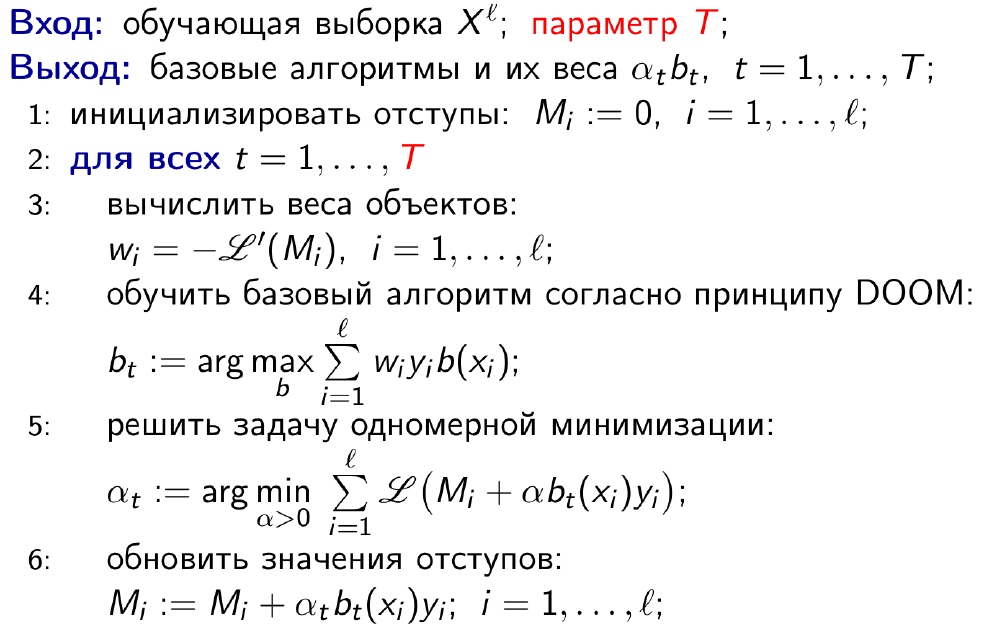

In [9]:
# Boosting
Image('pic/Boosting.png', height=600, width=600)

### Градиентный бустинг

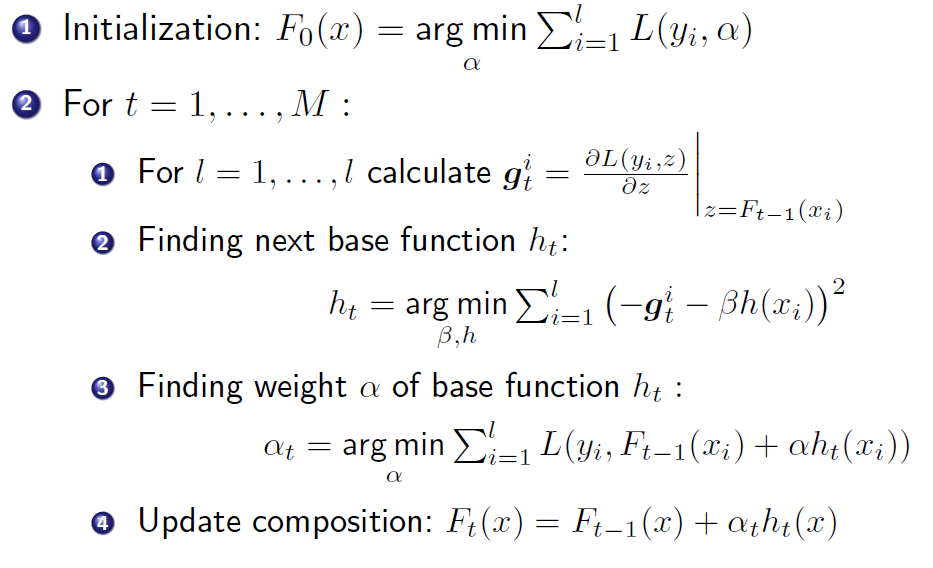

In [11]:
# Gradient Boosting
Image('pic/GBM.png', height=600, width=600)

### Пошаговый пример работы градиентного бустинга

##### Регрессия

C помощью GBM восстанавливаем зашумленную функцию $y=cos(x) + \varepsilon, \varepsilon \sim N(0,\dfrac{1}{5}), x \in [-5, 5]$

<img src='pics/gbm1.png'>

Запустим GBM и будем рисовать два типа графиков: актуальное приближение $\hat{f}(x)$ (синий график), а также каждое построенное дерево $\hat{f}_t(x)$ на своих псевдо-остатках (зеленый график). Номер графика соответствует номеру итерации:

<img src='pics/gbm2.png'>

<img src='pics/gbm3.png'>

Ко второй итерации наши деревья повторили основную форму функции. Однако, на первой итерации мы видим, что алгоритм построил только "левую ветвь" функции. Почему так происходит?

***Интерактивная демка, как GBM приближает функции: http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html***

##### Классификация

Решаем задачу бинарной классификации, $y \in \{ -1, +1\}$. Будем предсказывать и оптимизировать не сами метки классов, а их log-правдоподобие. Для этого переформулируем функции потерь над перемноженными предсказаниями и истинными метками $y \cdot f$7.

Варианты классификационных функций потерь:

***Logistic Loss:*** 
    $$L(y,f) = log(1 + exp(-2yf))$$
***Adaboost Loss:***
    $$L(y, f) = exp(-yf)$$

<img src='pics/gbm7.png'>

Решаем игрушечную задачу классификации, в качестве функции потерь выберем Logistic Loss:

<img src='pics/gbm4.png'>

<img src='pics/gbm5.png'>

<img src='pics/gbm6.png'>

На псевдо-остатках видно, что у нас есть достаточно много корректно классифицированных наблюдений, и какое-то количество наблюдений с большими ошибками, которые появились из-за шума в данных.

### Немного теоретических задач про GBDT

***Задача 1***

Что будет если обучать алгоритмы не на антиградиент, а на градиент в задаче регресии? Бинарной классификации? Насколько полезны будут получаться результаты?

***Задача 2***

Вы обучали градиентный бустинг, причём y-ки были в обучающей выборке были только положительные. Могут ли у вас получится отрицательные предсказания на тесте? А в бэггинге?

***Задача 3***

На что можно обучаться в GBDT вместо антиградиента?

### И немного практики: обзор популярных библиотек

### XGBoost

<img src='pics/xgboost.png' width=200>

1. Базовый алгоритм приближает направление, посчитанное с учетом вторых производных функции потерь.

2. Отклонение направления, построенного базовым алгоритмом, измеряется с помощью модифицированного функционала — из него удалено деление на вторую производную, за счет чего избегаются численные проблемы.

3. Функционал регуляризуется -- добавляются штрафы за количество листьев и за норму коэффициентов.

4. При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига.

5. Критерий останова при обучении дерева также зависит от оптимального сдвига.

##### Installation

http://xgboost.readthedocs.io/en/latest/build.html

###### Building on Ubuntu/Debian

In [ ]:
!git clone --recursive https://github.com/dmlc/xgboost
!cd xgboost
!make -j4

###### Building on MacOS

In [ ]:
!brew install gcc5
!pip install xgboost

###### Building on Windows

In [ ]:
git submodule init
git submodule update

In [ ]:
alias make='mingw32-make'

In [ ]:
cp make/mingw64.mk config.mk; make -j4

In [ ]:
mkdir build
cd build
cmake .. -G"Visual Studio 12 2013 Win64"

##### Test XGBoost

In [ ]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('train.txt')
dtest = xgb.DMatrix('test.txt')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

### CatBoost

<img src='pics/catboost.png' width=500>

https://github.com/catboost/catboost

https://tech.yandex.com/catboost/doc/dg/concepts/about-docpage/

##### Installation

In [ ]:
!pip install catboost

##### Test CatBoost

In [ ]:
import numpy 
from catboost import CatBoostRegressor

dataset = numpy.array([[1,4,5,6],[4,5,6,7],[30,40,50,60],[20,15,85,60]])
train_labels = [1.2,3.4,9.5,24.5]
model = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE')
fit_model = model.fit(dataset, train_labels)

print fit_model.get_params()

##### CatBoost Classifier

In [ ]:
import numpy as np
from catboost import CatBoostClassifier

# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 2, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))

# specify the training parameters 
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')

#train the model
model.fit(train_data, train_label, cat_features=[0,2,5])

# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

##### CatBoost Regressor

In [ ]:
import numpy as np
from catboost import Pool, CatBoostRegressor

# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 1000, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))

# initialize Pool
train_pool = Pool(train_data, train_label, cat_features=[0,2,5])
test_pool = Pool(test_data, cat_features=[0,2,5]) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')

#train the model
model.fit(train_pool)

# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

### Kaggle-Master Tips

##### Отбор признаков

<img src='pics/features.png'>

Данные можно взять здесь: https://github.com/Yorko/mlcourse_open/blob/master/data/hostel_factors.csv

Populating the interactive namespace from numpy and matplotlib
Feature ranking:
1. Персонал 0.182757 
2. Цена/качество 0.148373 
3. Состояние общего пространства 0.128296 
4. Дополнительные услуги 0.116604 
5. ССЦ 0.106668 
6. Общие условия и удобства 0.088589 
7. Состояние общей кухни 0.074273 
8. Заезд в хостел и выезд из хостела 0.061521 
9. Бронирование хостела  0.053615 
10. Состояние комнаты 0.039305 


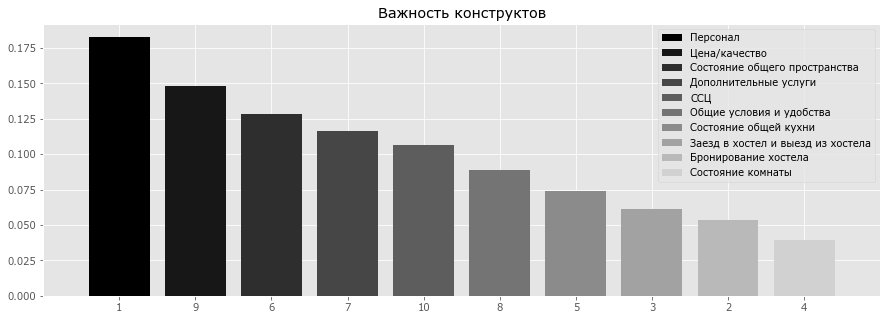

In [17]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
# russian headres
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor

hostel_data = pd.read_csv("hostel_factors.csv")
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Важность конструктов")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices])

##### Синтетический пример по отбору признаков

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier()),
                     LogisticRegression())

lr = LogisticRegression()
rf = RandomForestClassifier()

print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())

-0.2004494113262462
-0.21272071303245887
-0.13358934332276481


### Stacking & Blending

In [12]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

In [ ]:
print( "\nReading data from disk ...")
properties = pd.read_csv(r"../input/properties_2016.csv")
train_df = pd.read_csv("../input/train_2016_v2.csv")
test_df = pd.read_csv("../input/sample_submission.csv")
test_df = test_df.rename(columns={'ParcelId': 'parcelid'})

In [ ]:
train = train_df.merge(properties, how = 'left', on = 'parcelid')
test = test_df.merge(properties, on='parcelid', how='left')

##### Обработка категориальных признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder  

lbl = LabelEncoder()

for c in train.columns:
    train[c]=train[c].fillna(0)
    if train[c].dtype == 'object':
        lbl.fit(list(train[c].values))
        train[c] = lbl.transform(list(train[c].values))

for c in test.columns:
    test[c]=test[c].fillna(0)
    if test[c].dtype == 'object':
        lbl.fit(list(test[c].values))
        test[c] = lbl.transform(list(test[c].values))  

##### Обертка для удобной работы с базовыми моделями

In [ ]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn Regressor
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

##### Строим простые модели

In [ ]:
# Put in our parameters for said regressors
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 50,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':50,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 50,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 50,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [ ]:
#Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostRegressor, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingRegressor, seed=SEED, params=gb_params)
#svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
#svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector 

print("Training is complete")

In [ ]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

In [ ]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

In [ ]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Portland',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

##### Тренируем XGBoost на новых признаках

In [ ]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test), axis=1)

In [ ]:
X = x_train
y = y_train
y_mean = np.mean(y_train)

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xv, ytr, yv = train_test_split(X, y, test_size=0.2, random_state=2000)

dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Try different parameters! My favorite is random search :)
xgb_params = {
    'eta': 0.025,
    'max_depth': 7,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}

In [ ]:
model_xgb = xgb.train(xgb_params, dtrain, 2000, watchlist, early_stopping_rounds=300,
                  maximize=False, verbose_eval=15)

In [ ]:
dtest = xgb.DMatrix(x_test)
predicted_test_xgb = model_xgb.predict(dtest)

In [ ]:
sub = pd.read_csv('../input/sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = predicted_test_xgb

print('Writing csv ...')
sub.to_csv('xgb_stacked.csv', index=False, float_format='%.4f')

### Советы

Хорошая идея - смешивать RF, обученные на разных подмножествах признаков

<img src='pics/diakonov_1.png'>

<img src='pics/diakonov3.png'>

### Практика - HousePricePrediction Contest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

labels = train.SalePrice

train.drop(["Id", "SalePrice"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

In [ ]:
all = pd.concat([train, test], axis=0)

In [ ]:
to_drop = ["MiscFeature", "PoolQC"]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

for col in to_replace_to_none:
    all[col].fillna("No" + col, inplace=True)
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=350, n_jobs=-1)
print(cross_val_score(regr, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

In [ ]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

regr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
regr.fit(train, np.log1p(labels))
preds = regr.predict(test)
submit(np.expm1(preds))

In [4]:
# Your code here

**Оцените семинар:**

https://docs.google.com/forms/d/e/1FAIpQLSfraHKZKZ4NJp1-KKCb5w0qQtXjtK76IkXWz9hwMM2AG9qH_A/viewform